In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from numpy import mean
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
df_original = pd.read_csv('Prospect Summary.txt',delimiter='\t', header=0)

In [4]:
df_original['ID'] = range(1,len(df_original)+1)

In [5]:
df_original

,RegardingObjectId,Booking date,Phone Call Interval,Phone Call before booking,isbooking,Total Booking,isinLead,created Year,Leadindex,Lead Margin,...,created date,booking_first phone call_datediff,booking_created_date_datediff,Booking Index,First Phone Call Index,isBookingbehindPhonecall,Month,Lead Channel ID,Channel Name,ID
0,AEC7157D,NaN,1.0,551.0,No Booking,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,False,NaN,NaN,NaN,1
1,CBDF780C,NaN,1.0,430.0,No Booking,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,False,NaN,NaN,NaN,2
2,9F28BD74,NaN,1.0,244.0,No Booking,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,False,NaN,NaN,NaN,3
3,43A9C7FA,NaN,1.0,100.0,No Booking,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,False,NaN,NaN,NaN,4
4,5D08A6C7,NaN,1.0,93.0,No Booking,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,False,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,93761E29,NaN,NaN,NaN,No Booking,NaN,True,2018.0,NaN,NaN,...,3/3/2018 4:48:57 AM,NaN,NaN,NaN,NaN,False,3.0,100000000.0,Walk in,273724
273724,98A7B74D,NaN,NaN,NaN,No Booking,NaN,True,2018.0,NaN,NaN,...,4/13/2018 4:47:08 PM,NaN,NaN,NaN,NaN,False,4.0,100000000.0,Walk in,273725
273725,9A780FDA,NaN,63.0,NaN,No Booking,NaN,True,2018.0,NaN,NaN,...,4/22/2018 11:18:16 AM,NaN,NaN,NaN,NaN,False,4.0,100000000.0,Walk in,273726
273726,A5114BC8,NaN,NaN,NaN,No Booking,NaN,True,2018.0,NaN,NaN,...,5/11/2018 10:19:27 AM,NaN,NaN,NaN,NaN,False,5.0,100000007.0,Internet,273727


In [6]:
df_original = df_original.fillna(0)
df_original = df_original[(df_original['isinLead']==True)&(df_original['Phone Call before booking']>0)&(df_original['Phone Call Interval']<365)&(df_original['Lead Channel ID']>0)&(df_original['hourdiff_from_created']<=720)]
drop_columns = ['RegardingObjectId','Booking date','Total Booking','isinLead','created Year','Leadindex','Lead Margin','Payment Type','Last Phone Call Date before booking','Last Phone Call Group',
                'Month Year','Month Year Value','First Phone Call Date','created date','booking_first phone call_datediff','booking_created_date_datediff','Booking Index','First Phone Call Index',
                'isBookingbehindPhonecall','Month','Lead Channel ID']
df_original = df_original.drop(columns=drop_columns,axis=1)

In [7]:
df_original.columns.values

array(['Phone Call Interval', 'Phone Call before booking', 'isbooking',
       'Visit before booking', 'Test Drive before booking',
       'hourdiff_from_created', 'Channel Name', 'ID'], dtype=object)

In [8]:
re_order = ['ID','Phone Call Interval', 'Phone Call before booking', 'isbooking',
       'Visit before booking', 'Test Drive before booking',
       'hourdiff_from_created', 'Channel Name']
df_original = df_original[re_order]
df_original['isbooking'] = df_original['isbooking'].replace(['No Booking','Booking'],[0,1])
df_original

,ID,Phone Call Interval,Phone Call before booking,isbooking,Visit before booking,Test Drive before booking,hourdiff_from_created,Channel Name
6,7,339.0,12.0,0,0.0,0.0,14.0,Event
10,11,265.0,11.0,0,0.0,0.0,20.0,Event
12,13,30.0,6.0,1,0.0,0.0,41.0,Event
20,21,196.0,9.0,0,0.0,0.0,14.0,Event
34,35,249.0,9.0,0,0.0,0.0,43.0,Event
...,...,...,...,...,...,...,...,...
271288,271289,60.0,3.0,0,0.0,0.0,0.0,Call
271329,271330,56.0,4.0,0,0.0,0.0,0.0,Walk in
271334,271335,79.0,4.0,0,0.0,0.0,47.0,Walk in
271355,271356,216.0,6.0,0,0.0,0.0,0.0,Walk in


In [9]:
def Phone_Call_interval(columns):
    if columns <= 3 :
        return '<3'
    elif columns <=10 :
        return '<=10'
    elif columns <= 20 :
        return '<=20'
    elif columns <= 30 :
        return '<=30'
    elif columns <= 60 :
        return '<=60'
    elif columns <= 90 :
        return '<=90'
    elif columns <= 180 :
        return '<=180'
    else:
        return '>180'
      

In [10]:
def myround(x, base=12):
    return int(base * round(x/base))

In [11]:
df_original['Phone Call Interval'] = df_original['Phone Call Interval'].apply(Phone_Call_interval)


In [12]:
df_original['hourdiff_from_created'] = df_original['hourdiff_from_created'].apply(myround)

In [13]:
df_original['hourdiff_from_created'] = df_original['hourdiff_from_created'].astype(str)

In [14]:
df_original

,ID,Phone Call Interval,Phone Call before booking,isbooking,Visit before booking,Test Drive before booking,hourdiff_from_created,Channel Name
6,7,>180,12.0,0,0.0,0.0,12,Event
10,11,>180,11.0,0,0.0,0.0,24,Event
12,13,<=30,6.0,1,0.0,0.0,36,Event
20,21,>180,9.0,0,0.0,0.0,12,Event
34,35,>180,9.0,0,0.0,0.0,48,Event
...,...,...,...,...,...,...,...,...
271288,271289,<=60,3.0,0,0.0,0.0,0,Call
271329,271330,<=60,4.0,0,0.0,0.0,0,Walk in
271334,271335,<=90,4.0,0,0.0,0.0,48,Walk in
271355,271356,>180,6.0,0,0.0,0.0,0,Walk in


In [15]:
df_dummy = df_original.copy()

In [16]:
cols = [0,2,3,4,5]
df_dummy = df_dummy.drop(df_dummy.columns[cols],axis=1)


In [17]:
df_dummy = pd.get_dummies(df_dummy)

In [18]:
df_dummy

,Phone Call Interval_<3,Phone Call Interval_<=10,Phone Call Interval_<=180,Phone Call Interval_<=20,Phone Call Interval_<=30,Phone Call Interval_<=60,Phone Call Interval_<=90,Phone Call Interval_>180,hourdiff_from_created_0,hourdiff_from_created_108,...,hourdiff_from_created_96,Channel Name_Call,Channel Name_Digital IMX,Channel Name_Event,Channel Name_Internet,Channel Name_Other,Channel Name_Referral,Channel Name_Retention,Channel Name_SEM CRM,Channel Name_Walk in
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
12,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
34,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271288,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
271329,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
271334,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
271355,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df_original_final = pd.concat([df_original,df_dummy],axis=1)

In [20]:
df_original_final = df_original_final.drop(['Phone Call Interval','ID','Channel Name','hourdiff_from_created'],axis=1)

In [21]:
df_original_final = df_original_final.fillna(0)
df_original_final

,Phone Call before booking,isbooking,Visit before booking,Test Drive before booking,Phone Call Interval_<3,Phone Call Interval_<=10,Phone Call Interval_<=180,Phone Call Interval_<=20,Phone Call Interval_<=30,Phone Call Interval_<=60,...,hourdiff_from_created_96,Channel Name_Call,Channel Name_Digital IMX,Channel Name_Event,Channel Name_Internet,Channel Name_Other,Channel Name_Referral,Channel Name_Retention,Channel Name_SEM CRM,Channel Name_Walk in
6,12.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,11.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12,6.0,1,0.0,0.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
20,9.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
34,9.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271288,3.0,0,0.0,0.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
271329,4.0,0,0.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
271334,4.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
271355,6.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
df_final = df_original_final.copy()


In [23]:
df_final_scaled = df_final.copy()

col_names = ['Phone Call before booking','Visit before booking','Test Drive before booking']
features = df_final_scaled[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.fit_transform(features.values)

df_final_scaled[col_names] = features

In [24]:
df_final_scaled

,Phone Call before booking,isbooking,Visit before booking,Test Drive before booking,Phone Call Interval_<3,Phone Call Interval_<=10,Phone Call Interval_<=180,Phone Call Interval_<=20,Phone Call Interval_<=30,Phone Call Interval_<=60,...,hourdiff_from_created_96,Channel Name_Call,Channel Name_Digital IMX,Channel Name_Event,Channel Name_Internet,Channel Name_Other,Channel Name_Referral,Channel Name_Retention,Channel Name_SEM CRM,Channel Name_Walk in
6,0.542736,0,-0.210423,-0.286079,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,0.449339,0,-0.210423,-0.286079,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12,-0.017645,1,-0.210423,-0.286079,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
20,0.262546,0,-0.210423,-0.286079,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
34,0.262546,0,-0.210423,-0.286079,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271288,-0.297835,0,-0.210423,-0.286079,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
271329,-0.204438,0,-0.210423,-0.286079,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
271334,-0.204438,0,-0.210423,-0.286079,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
271355,-0.017645,0,-0.210423,-0.286079,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df_no_booking = df_final_scaled.copy()

In [26]:
df_no_booking = df_no_booking[(df_no_booking['isbooking'])==0]
df_no_booking_for_learn = df_no_booking.iloc[:int(round(len(df_no_booking)/2,0)),:]
df_no_booking_for_predict = df_no_booking.iloc[int(round(len(df_no_booking)/2,0)):,:]

In [27]:
df_booking = df_final_scaled.copy()

In [28]:
df_booking = df_booking[(df_booking['isbooking']==1)]
df_booking_for_learn = df_booking.iloc[:int(round(len(df_booking)/2,0)),:]
df_booking_for_predict = df_booking.iloc[int(round(len(df_booking)/2,0)):,:]

In [29]:
df_final_learn = df_no_booking_for_learn.append(df_booking_for_learn)
df_final_predict = df_no_booking_for_predict.append(df_booking_for_predict)
df_final_learn = shuffle(df_final_learn,random_state=999)
df_final_learn_predict = shuffle(df_final_predict,random_state=999)

In [30]:
X = df_final_learn.drop('isbooking',axis=1)
y = df_final_learn['isbooking']
X_for_predict = df_final_predict.drop('isbooking',axis=1)
y_for_predict = df_final_predict['isbooking']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 1000)

In [101]:
svclassifier = SVC(kernel='rbf',class_weight={0:0.26,1:0.74},C=30,gamma=0.08)
svclassifier.fit(X_train, y_train)

SVC(C=30, class_weight={0: 0.26, 1: 0.74}, gamma=0.08)

In [102]:
le = LogisticRegression(class_weight={0:0.26,1:0.74}, random_state=10000)
le.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.26, 1: 0.74}, random_state=10000)

In [103]:
y_pred = svclassifier.predict(X_test)
y_pred_le = le.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred_le, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_le))

Predicted     0    1   All
Actual                    
0          5042  193  5235
1           177  470   647
All        5219  663  5882
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5235
           1       0.71      0.73      0.72       647

    accuracy                           0.94      5882
   macro avg       0.84      0.84      0.84      5882
weighted avg       0.94      0.94      0.94      5882

Predicted     0    1   All
Actual                    
0          5025  210  5235
1           197  450   647
All        5222  660  5882
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5235
           1       0.68      0.70      0.69       647

    accuracy                           0.93      5882
   macro avg       0.82      0.83      0.82      5882
weighted avg       0.93      0.93      0.93      5882



In [104]:
y_pred_to_new_set = svclassifier.predict(X_for_predict)
y_pred_le_new_set = le.predict(X_for_predict)
print(pd.crosstab(y_for_predict, y_pred_to_new_set, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_for_predict, y_pred_to_new_set))
print(pd.crosstab(y_for_predict, y_pred_le_new_set, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_for_predict,  y_pred_le_new_set))

Predicted      0     1    All
Actual                       
0          24879  1280  26159
1            885  2365   3250
All        25764  3645  29409
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     26159
           1       0.65      0.73      0.69      3250

    accuracy                           0.93     29409
   macro avg       0.81      0.84      0.82     29409
weighted avg       0.93      0.93      0.93     29409

Predicted      0     1    All
Actual                       
0          25044  1115  26159
1            976  2274   3250
All        26020  3389  29409
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     26159
           1       0.67      0.70      0.69      3250

    accuracy                           0.93     29409
   macro avg       0.82      0.83      0.82     29409
weighted avg       0.93      0.93      0.93     29409



In [36]:
lr = SVC()
#Setting the range for class weights
weights = np.linspace(0.0,0.99,10)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}


#Fitting grid search to the train data with 5 folds
gridsearch_recall = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=3), 
                          n_jobs=-1, 
                          scoring='recall', 
                          verbose=2).fit(X_train, y_train)

gridsearch_precision = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=3), 
                          n_jobs=-1, 
                          scoring='precision', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [37]:
test = pd.DataFrame(gridsearch_recall.cv_results_)

In [38]:
test

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,54.335701,0.049660,0.045924,0.002380,"{0: 0.0, 1: 1.0}","{'class_weight': {0: 0.0, 1: 1.0}}",1.000000,1.000000,1.000000,1.000000,0.000000,1
1,31.090196,0.670820,25.634215,1.397061,"{0: 0.11, 1: 0.89}","{'class_weight': {0: 0.11, 1: 0.89}}",0.864055,0.847926,0.800461,0.837481,0.026992,2
2,20.761461,0.562426,16.988117,0.299884,"{0: 0.22, 1: 0.78}","{'class_weight': {0: 0.22, 1: 0.78}}",0.778802,0.728111,0.720877,0.742596,0.025771,3
3,16.062129,1.269682,13.485754,2.690142,"{0: 0.33, 1: 0.6699999999999999}","{'class_weight': {0: 0.33, 1: 0.66999999999999...",0.664747,0.641705,0.642445,0.649632,0.010692,4
4,10.852081,0.123917,10.661193,0.951706,"{0: 0.44, 1: 0.56}","{'class_weight': {0: 0.44, 1: 0.56}}",0.635945,0.587558,0.617070,0.613524,0.019912,5
5,11.156027,0.185597,10.365248,0.501244,"{0: 0.55, 1: 0.44999999999999996}","{'class_weight': {0: 0.55, 1: 0.44999999999999...",0.533410,0.470046,0.545559,0.516339,0.033107,6
6,10.700212,0.557172,10.424703,0.583347,"{0: 0.66, 1: 0.33999999999999997}","{'class_weight': {0: 0.66, 1: 0.33999999999999...",0.490783,0.460829,0.490196,0.480603,0.013984,7
7,11.827900,0.799377,9.353651,1.607335,"{0: 0.77, 1: 0.22999999999999998}","{'class_weight': {0: 0.77, 1: 0.22999999999999...",0.487327,0.458525,0.489043,0.478298,0.013999,8
8,9.142771,0.887001,7.965111,0.537379,"{0: 0.88, 1: 0.12}","{'class_weight': {0: 0.88, 1: 0.12}}",0.480415,0.456221,0.483276,0.473304,0.012136,9
9,9.878347,0.289523,8.742060,0.531148,"{0: 0.99, 1: 0.010000000000000009}","{'class_weight': {0: 0.99, 1: 0.01000000000000...",0.388249,0.389401,0.402537,0.393396,0.006481,10


C:\Users\weerapat.nun\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

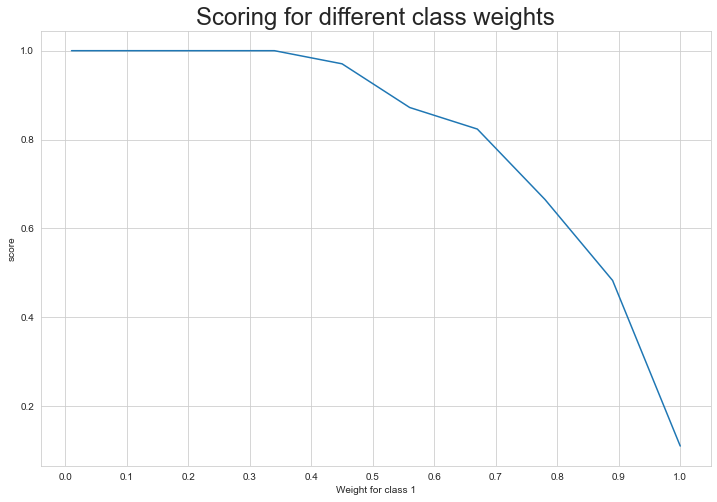

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weight_data = pd.DataFrame({'recall': gridsearch_recall.cv_results_['mean_test_score'],'precision': gridsearch_precision.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weight_data['weight'],weight_data['precision'])
plt.xlabel('Weight for class 1')
plt.ylabel('score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

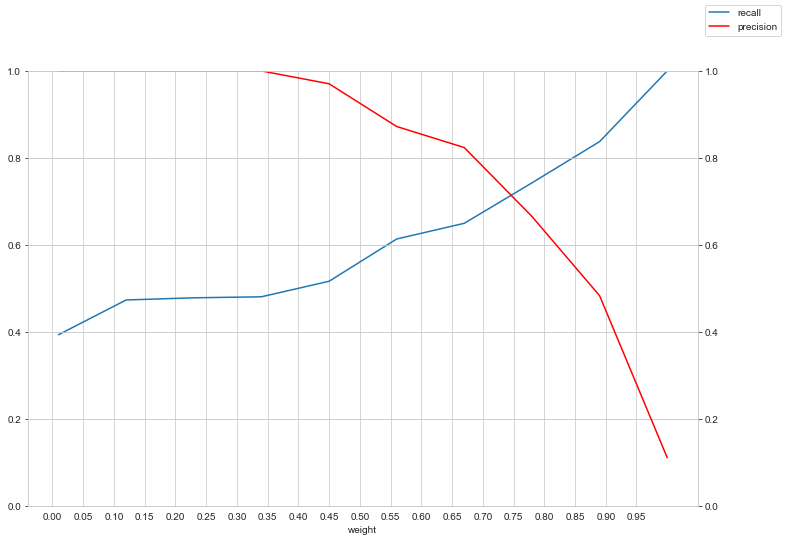

In [40]:

ax = weight_data.plot(x='weight', y='recall', xticks=np.arange(0,1,0.05),legend=False,figsize=(12,8))
ax2 = ax.twinx()
weight_data.plot(x='weight',y='precision', ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set_ylim(0,1)
ax2.set_ylim(0,1)

plt.show()

In [41]:
C_range = np.logspace(10, -2, 1)
gamma_range = np.logspace(-9, 3, 1)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedKFold(n_splits=2)
grid = GridSearchCV(SVC(class_weight={0:0.26,1:0.74},kernel='rbf'), param_grid=param_grid, cv=cv,n_jobs=-1,verbose=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=SVC(class_weight={0: 0.26, 1: 0.74}), n_jobs=-1,
             param_grid={'C': array([1.e+10]), 'gamma': array([1.e-09])},
             verbose=2)

In [42]:
y_pred_test = grid.predict(X_test)

print(pd.crosstab(y_test, y_pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(classification_report(y_test, y_pred_test))


Predicted     0    1   All
Actual                    
0          5196   39  5235
1           358  289   647
All        5554  328  5882
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5235
           1       0.88      0.45      0.59       647

    accuracy                           0.93      5882
   macro avg       0.91      0.72      0.78      5882
weighted avg       0.93      0.93      0.92      5882



In [43]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))


In [44]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

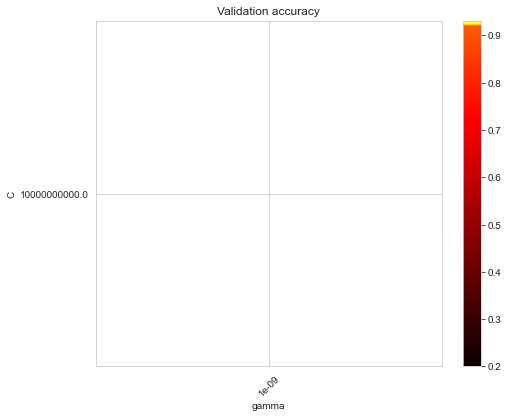

In [45]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [46]:
svc = SVC(class_weight={0:0.26,1:0.74})
C_range = np.logspace(-2, 2, 3)

#Creating a dictionary grid for grid search
param_grid = dict(C=C_range)


#Fitting grid search to the train data with 5 folds
gridsearch_recall_C = GridSearchCV(estimator= svc, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=2), 
                          n_jobs=-1, 
                          scoring='recall', 
                          verbose=2).fit(X_train, y_train)

gridsearch_precision_C = GridSearchCV(estimator= svc, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=2), 
                          n_jobs=-1, 
                          scoring='precision', 
                          verbose=2).fit(X_train, y_train)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits


In [47]:
c_range_data = pd.DataFrame({'recall': gridsearch_recall_C.cv_results_['mean_test_score'],'precision': gridsearch_precision_C.cv_results_['mean_test_score'], 'c_range': C_range})

In [48]:
c_range_data

,recall,precision,c_range
0,0.461778,1.000000,0.01
1,0.687680,0.746352,1.00
2,0.720323,0.693947,100.00


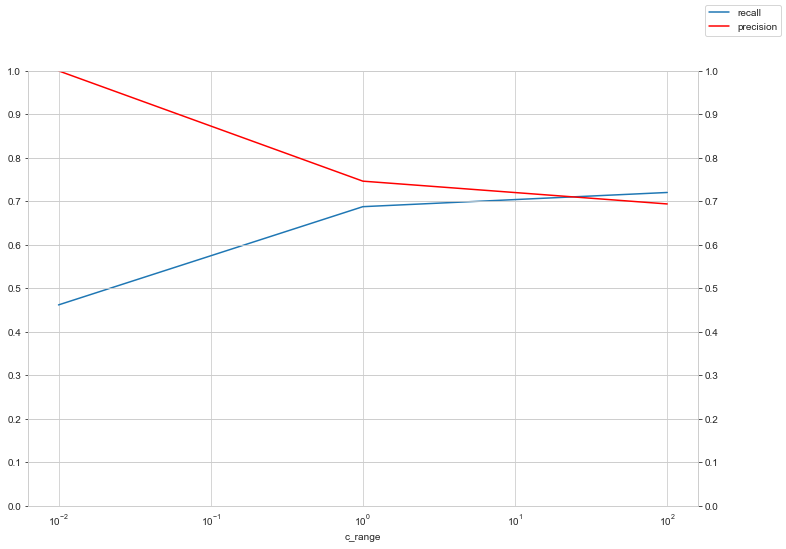

In [49]:
ax_c = c_range_data.plot(x='c_range', y='recall',legend=False,figsize=(12,8),logx=True,grid=True,yticks=np.linspace(0,1,11))
ax2_c = ax_c.twinx()
c_range_data.plot(x='c_range',y='precision', ax=ax2_c, legend=False, color="r",logx=True,yticks=np.linspace(0,1,11))
ax_c.figure.legend()
ax_c.set_ylim(0,1)
ax2_c.set_ylim(0,1)

plt.show()

In [79]:
svc = SVC(class_weight={0:0.26,1:0.74},C=30)
gamma_range = np.logspace(-5, -1, 3)

#Creating a dictionary grid for grid search
param_grid = dict(gamma=gamma_range)


#Fitting grid search to the train data with 5 folds
gridsearch_recall_gamma = GridSearchCV(estimator= svc, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=2), 
                          n_jobs=-1, 
                          scoring='recall', 
                          verbose=2).fit(X_train, y_train)

gridsearch_precision_gamma = GridSearchCV(estimator= svc, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=2), 
                          n_jobs=-1, 
                          scoring='precision', 
                          verbose=2).fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits


In [80]:
gamma_range_data = pd.DataFrame({'recall': gridsearch_recall_gamma.cv_results_['mean_test_score'],'precision': gridsearch_precision_gamma.cv_results_['mean_test_score'], 'gamma_range': gamma_range})

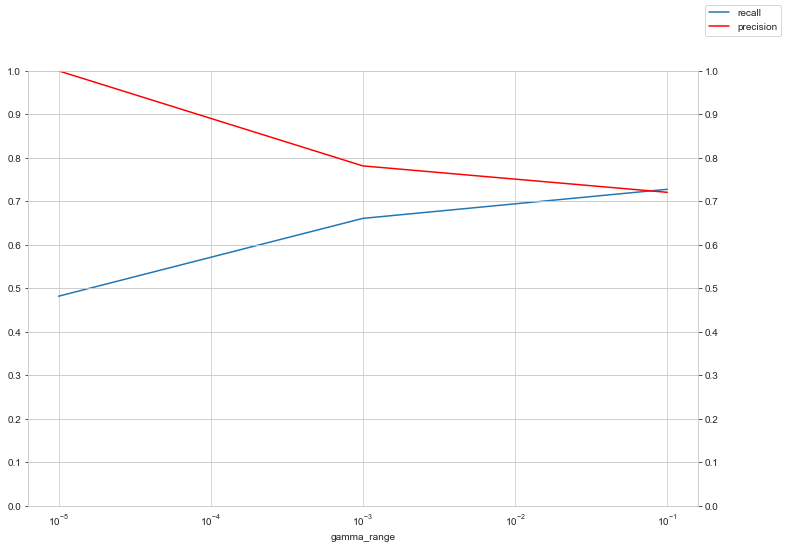

In [100]:
ax_gamma = gamma_range_data.plot(x='gamma_range', y='recall',legend=False,figsize=(12,8),logx=True,grid=True,yticks=np.linspace(0,1,11))
ax2_gamma = ax_gamma.twinx()
gamma_range_data.plot(x='gamma_range',y='precision', ax=ax2_gamma, legend=False, color="r",logx=True,yticks=np.linspace(0,1,11))
ax_gamma.figure.legend()
ax_gamma.set_ylim(0,1)
ax2_gamma.set_ylim(0,1)

plt.show()

In [115]:
def run_exp(X_train,y_train,X_test,y_test):
    dfs = []
    models = [
          ('svc_normal', SVC()),
          ('svc_full_adjusted', SVC(kernel='rbf',class_weight={0:0.26,1:0.74},C=30,gamma=0.08)),
          ('svc_weight', SVC(kernel='rbf',class_weight={0:0.26,1:0.74})),
          ('svc_C', SVC(kernel='rbf',C=30)),
          ('svc_gamma', SVC(kernel='rbf',gamma=0.08)) 
             ]
    results = []
    names = []
    scoring = ['accuracy', 'precision', 'recall', 'f1_weighted', 'roc_auc']
    target_names = ['No buy', 'buy']
    for name, model in models:
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_new = clf.predict(X_for_predict)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        print(classification_report(y_for_predict, y_pred_new, target_names=target_names))

In [116]:
run_exp(X_train,y_train,X_test,y_test)

svc_normal
              precision    recall  f1-score   support

      No buy       0.95      0.99      0.97      5235
         buy       0.87      0.56      0.68       647

    accuracy                           0.94      5882
   macro avg       0.91      0.77      0.82      5882
weighted avg       0.94      0.94      0.94      5882

              precision    recall  f1-score   support

      No buy       0.95      0.99      0.97     26159
         buy       0.86      0.59      0.70      3250

    accuracy                           0.94     29409
   macro avg       0.91      0.79      0.84     29409
weighted avg       0.94      0.94      0.94     29409

svc_full_adjusted
              precision    recall  f1-score   support

      No buy       0.97      0.96      0.96      5235
         buy       0.71      0.73      0.72       647

    accuracy                           0.94      5882
   macro avg       0.84      0.84      0.84      5882
weighted avg       0.94      0.94      0.94  